In [89]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display
from datetime import datetime
%matplotlib inline

In [90]:
data = pd.read_csv('../Dataset/final_dataset_L1.csv')

# Remove first 3 matchweeks
data = data[data.MW > 3]

data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)


# Preview data.
data.isna().sum()
data.shape
data=data.dropna(axis=0)

data.isna().sum()
data.shape

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == "__main__":


(6149, 18)

In [156]:
def rebuild():   
    f=pd.read_csv("../Dataset/classement_L1.csv")

    f=f.iloc[:,[1,-1]]
    f.reset_index()
    f.head()

    d=pd.read_csv("../Dataset/final_dataset_L1.csv")
    c=pd.read_csv("../Dataset/note_L1.csv")
    c = c.rename(columns={"Unnamed: 0": "Equipe"})
    for i in range(len(d)):
        ht = d.loc[i, "HomeTeam"]
        at = d.loc[i, "AwayTeam"]
        home_class = int(f.loc[f["Equipe"] == ht, "class"].values[0])
        away_class = int(f.loc[f["Equipe"] == at, "class"].values[0])
        home_note=int(c.loc[c["Equipe"] == ht, "NoteGenerale"].values[0])
        away_note=int(c.loc[c["Equipe"] == at, "NoteGenerale"].values[0])
        d.at[i, "HomeClass"] = int(home_class)
        d.at[i, "AwayClass"] = int(away_class)
        d.at[i, "HomeNote"] = int(home_note)
        d.at[i, "AwayNote"] = int(away_note)
    return d





In [157]:
d=rebuild()


In [158]:
d

,Unnamed: 0,Unnamed: 0.1,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,...,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,HomeNote,AwayNote,HomeClass,AwayClass
0,0,0,29-07-2005,Paris SG,Metz,4.0,1.0,H,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,-11,84.0,69.0,1.0,32.0
1,1,1,30-07-2005,Lille,Rennes,1.0,0.0,H,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,-3,79.0,74.0,5.0,7.0
2,2,2,30-07-2005,Marseille,Bordeaux,0.0,2.0,NH,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,2,81.0,74.0,3.0,10.0
3,3,3,30-07-2005,Nancy,Monaco,0.0,1.0,NH,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,1,72.0,77.0,32.0,5.0
4,4,4,30-07-2005,Nantes,Lens,2.0,0.0,H,0.0,0.0,...,0,0.000000,0.000000,0.000000,0.000000,9,72.0,74.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,6684,325,30-04-2023,Troyes,Nice,0.0,1.0,NH,41.0,39.0,...,0,-0.848485,0.242424,-0.696970,0.000000,10,68.0,72.0,40.0,7.0
6685,6685,326,30-04-2023,Paris SG,Lorient,1.0,3.0,NH,75.0,43.0,...,0,1.333333,-0.030303,0.909091,0.212121,-9,84.0,72.0,1.0,15.0
6686,6686,327,30-04-2023,Marseille,Auxerre,2.0,1.0,H,59.0,30.0,...,0,0.848485,-0.696970,1.030303,0.030303,-13,81.0,70.0,3.0,32.0
6687,6687,328,02-05-2023,Toulouse,Lens,0.0,1.0,NH,48.0,54.0,...,0,-0.181818,0.878788,-0.757576,-0.181818,10,71.0,74.0,15.0,18.0


In [208]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import xgboost as xgb
# from sklearn.linear_model import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from IPython.display import display
from datetime import datetime
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# %matplotlib inline


def reading(string):
    data=pd.read_csv(string)
    # Remove first 3 matchweeks
    data = data[data.MW > 3]

    data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
            'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
            'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
            'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)
    # Preview data.
    data=data.dropna(axis=0)
    # Total number of students.
    n_matches = data.shape[0]

    # Calculate number of features.
    n_features = data.shape[1] - 1

    # Calculate matches won by home team.
    n_homewins = len(data[data.FTR == 'H'])

    # Calculate win rate for home team.
    win_rate = (float(n_homewins) / (n_matches)) * 100

    # Print the results
    # print ("Total number of matches: {}".format(n_matches))
    # print ("Number of features: {}".format(n_features))
    # print ("Number of matches won by home team: {}".format(n_homewins))
    # print ("Win rate of home team: {:.2f}%".format(win_rate))
    # Visualising distribution of data
    # scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))   
    X_all = data.drop(['FTR'],1)
    y_all = data['FTR']
    X_all.HM1 = X_all.HM1.astype('str')
    X_all.HM2 = X_all.HM2.astype('str')
    X_all.HM3 = X_all.HM3.astype('str')
    X_all.AM1 = X_all.AM1.astype('str')
    X_all.AM2 = X_all.AM2.astype('str')
    X_all.AM3 = X_all.AM3.astype('str')
    

    from sklearn.preprocessing import LabelEncoder,MinMaxScaler
    le = LabelEncoder()
    sc=MinMaxScaler()
    def preprocess_features(X):
        ''' Preprocesses the football data and converts catagorical variables into numeric variables using LabelEncoder. '''
        
        # Initialize LabelEncoder
        

        # Iterate over columns
        for col in X.columns:

            # If data type is categorical, transform to numeric
            if X[col].dtype == object:
                X[col] = le.fit_transform(X[col].astype(str))
        return X
    
    preprocess_features(X_all)
   
    a=X_all.drop(["Unnamed: 0.1"],1)
    X_all=sc.fit_transform(a)

    



    
   

    # Shuffle and split the dataset into training and testing set.
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                        test_size = 50,
                                                        random_state = 2,
                                                        stratify = y_all)   


    # preprocess_features(X_all)
    # print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))



    return sc,le,X_train, X_test, y_train, y_test

In [209]:
sc,le,X_train, X_test, y_train, y_test=reading('../Dataset/final_dataset_PL.csv')

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [213]:
X_test

array([[0.67341772, 0.38987342, 0.        , 0.        , 1.        ,
        1.        , 0.5       , 0.        , 0.61666667, 0.33142857,
        0.58888889, 0.23684211, 0.80769231, 0.34615385],
       [0.35443038, 0.23628692, 1.        , 0.5       , 1.        ,
        0.5       , 1.        , 0.        , 0.38333333, 0.28571429,
        0.57407407, 0.47368421, 0.46153846, 0.38461538],
       [0.46272855, 0.41350211, 1.        , 0.5       , 0.5       ,
        1.        , 0.        , 1.        , 0.44351852, 0.32380952,
        0.44444444, 0.44736842, 0.34615385, 0.38461538],
       [0.58126582, 0.42531646, 1.        , 0.        , 0.        ,
        0.5       , 0.5       , 0.        , 0.51333333, 0.39314286,
        0.56222222, 0.31578947, 0.80769231, 0.46153846],
       [0.41350211, 0.4233474 , 0.        , 0.5       , 0.        ,
        0.        , 1.        , 0.        , 0.41574074, 0.38571429,
        0.48148148, 0.57894737, 0.96153846, 0.34615385],
       [0.28583095, 0.66312781, 0.5

In [60]:
d.head(20)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,HomeClass,AwayClass
0,0,29-07-2005,Paris SG,Metz,4.0,1.0,H,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,-11,1.0,23.0
1,1,30-07-2005,Lille,Rennes,1.0,0.0,H,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,-3,4.0,6.0
2,2,30-07-2005,Marseille,Bordeaux,0.0,2.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,2,3.0,10.0
3,3,30-07-2005,Nancy,Monaco,0.0,1.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,1,23.0,4.0
4,4,30-07-2005,Nantes,Lens,2.0,0.0,H,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,9,11.0,16.0
5,5,30-07-2005,Nice,Troyes,1.0,1.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,-9,6.0,33.0
6,6,30-07-2005,Sochaux,Toulouse,0.0,1.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,-1,23.0,13.0
7,7,30-07-2005,St Etienne,Ajaccio,0.0,0.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,-5,8.0,23.0
8,8,30-07-2005,Strasbourg,Auxerre,0.0,0.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,12,16.0,23.0
9,9,31-07-2005,Le Mans,Lyon,1.0,2.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,9,33.0,2.0


In [47]:
int(f[f.Equipe=="Paris SG"]["class"].values)

1

In [49]:
d.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,HomeClass,AwayClass
0,0,29-07-2005,Paris SG,Metz,4.0,1.0,H,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,-11,19,11
1,1,30-07-2005,Lille,Rennes,1.0,0.0,H,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,-3,19,11
2,2,30-07-2005,Marseille,Bordeaux,0.0,2.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,2,19,11
3,3,30-07-2005,Nancy,Monaco,0.0,1.0,NH,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,1,19,11
4,4,30-07-2005,Nantes,Lens,2.0,0.0,H,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,9,19,11


In [91]:
data.dropna(axis=0)
print(data.isna().sum())

Unnamed: 0.1    0
FTR             0
HTP             0
ATP             0
HM1             0
HM2             0
HM3             0
AM1             0
AM2             0
AM3             0
HTGD            0
ATGD            0
DiffFormPts     0
DiffLP          0
HomeClass       0
AwayClass       0
HomeNote        0
AwayNote        0
dtype: int64


In [92]:
# Total number of students.
n_matches = data.shape[0]

# Calculate number of features.
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print ("Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6149
Number of features: 17
Number of matches won by home team: 2746
Win rate of home team: 44.66%


array([[<AxesSubplot:xlabel='HTGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTGD'>,
        <AxesSubplot:xlabel='DiffLP', ylabel='HTGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATGD', ylabel='ATGD'>,
        <AxesSubplot:xlabel='HTP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='ATP', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='ATGD'>,
        <AxesSubplot:xlabel='DiffLP', ylabel='ATGD'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATGD', ylabel='HTP'>,
        <AxesSubplot:xlabel='HTP', ylabel='HTP'>,
        <AxesSubplot:xlabel='ATP', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffFormPts', ylabel='HTP'>,
        <AxesSubplot:xlabel='DiffLP', ylabel='HTP'>],
       [<AxesSubplot:xlabel='HTGD', ylabel='AT

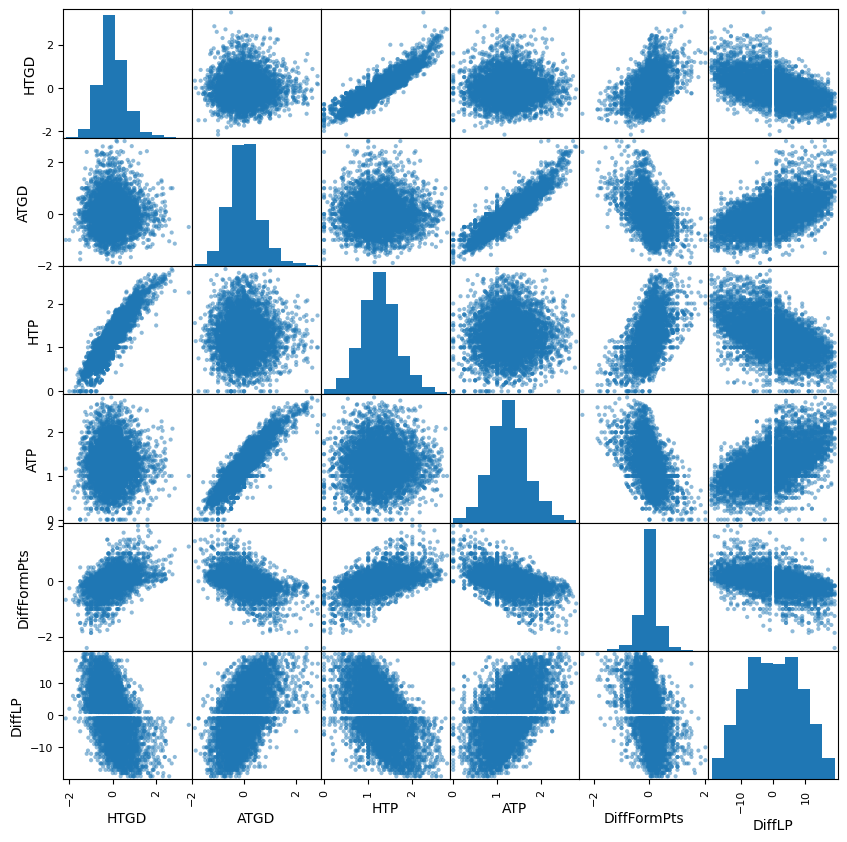

In [27]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix


scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))

In [93]:
# Separate into feature set and target variable
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# Standardising the data.
# from sklearn.preprocessing import scale


# cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
# for col in cols:
#     X_all[col] = scale(X_all[col])

# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()


# cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
# for col in cols:
#     X_all[col] = scaler.fit_transform(X_all[col])

c:\Users\adikp\pergola\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [94]:
X_all

,Unnamed: 0.1,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,HomeClass,AwayClass,HomeNote,AwayNote
30,30,1.250000,1.000000,W,D,D,W,D,L,0.500000,0.750000,0.250000,8,33.0,41.0,66.0,72.0
31,31,1.500000,1.500000,L,W,W,W,L,W,0.500000,0.000000,0.000000,-9,11.0,6.0,74.0,77.0
32,32,1.500000,1.750000,W,W,L,W,W,D,0.250000,0.750000,-0.250000,-2,19.0,33.0,74.0,70.0
33,33,1.750000,0.000000,D,W,W,L,L,L,0.500000,-0.750000,1.750000,-11,3.0,33.0,83.0,72.0
34,34,0.250000,0.250000,L,D,L,L,L,D,-1.250000,-0.500000,0.000000,1,33.0,19.0,69.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,325,0.666667,1.363636,D,L,L,L,L,L,-0.848485,0.242424,0.000000,10,41.0,8.0,68.0,72.0
6685,326,2.272727,1.363636,W,W,W,L,L,D,1.333333,-0.030303,0.212121,-9,2.0,16.0,84.0,72.0
6686,327,2.030303,1.000000,W,W,D,D,W,W,0.848485,-0.696970,0.030303,-13,4.0,33.0,81.0,70.0
6687,328,1.242424,2.000000,W,L,W,W,L,W,-0.181818,0.878788,-0.181818,10,16.0,19.0,71.0,74.0


In [95]:
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into numeric variables using LabelEncoder. '''
    
    # Initialize LabelEncoder
    

    # Iterate over columns
    for col in X.columns:

        # If data type is categorical, transform to numeric
        if X[col].dtype == object:
            X[col] = le.fit_transform(X[col].astype(str))
    
    return X


preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (17 total features):
['Unnamed: 0.1', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP', 'HomeClass', 'AwayClass', 'HomeNote', 'AwayNote']


In [96]:
X_all

,Unnamed: 0.1,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,HomeClass,AwayClass,HomeNote,AwayNote
30,30,1.250000,1.000000,2,0,0,2,0,1,0.500000,0.750000,0.250000,8,33.0,41.0,66.0,72.0
31,31,1.500000,1.500000,1,2,2,2,1,2,0.500000,0.000000,0.000000,-9,11.0,6.0,74.0,77.0
32,32,1.500000,1.750000,2,2,1,2,2,0,0.250000,0.750000,-0.250000,-2,19.0,33.0,74.0,70.0
33,33,1.750000,0.000000,0,2,2,1,1,1,0.500000,-0.750000,1.750000,-11,3.0,33.0,83.0,72.0
34,34,0.250000,0.250000,1,0,1,1,1,0,-1.250000,-0.500000,0.000000,1,33.0,19.0,69.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,325,0.666667,1.363636,0,1,1,1,1,1,-0.848485,0.242424,0.000000,10,41.0,8.0,68.0,72.0
6685,326,2.272727,1.363636,2,2,2,1,1,0,1.333333,-0.030303,0.212121,-9,2.0,16.0,84.0,72.0
6686,327,2.030303,1.000000,2,2,0,0,2,2,0.848485,-0.696970,0.030303,-13,4.0,33.0,81.0,70.0
6687,328,1.242424,2.000000,2,1,2,2,1,2,-0.181818,0.878788,-0.181818,10,16.0,19.0,71.0,74.0


In [106]:
a=pd.read_csv("../Dataset/classement.csv").replace("-",19)
teams=len(a)

In [107]:
teams

43

In [152]:
l=[]
for i in range(teams):
    temp=a.iloc[i,7:19].values

    r=0
    for j in range(len(temp)): 
        r=r+int(temp[j])
    r=int(r/len(temp))
        
    l.append(r)
p=[]
print(l)
y=0
for i in range(teams):
    k=1
    for j in range(teams):
        if l[i]>l[j]:
            k=k+1 
    if k in p:
        i=p.count(k)       
        p.append(k+i)
    else:
        p.append(k)

a["class"]=p

[8, 19, 19, 4, 1, 5, 15, 19, 18, 12, 5, 17, 15, 15, 16, 18, 19, 4, 12, 19, 8, 11, 17, 14, 3, 13, 19, 19, 19, 19, 19, 15, 12, 19, 18, 18, 19, 18, 18, 18, 19, 18, 19]


In [155]:
p

[7,
 30,
 31,
 3,
 1,
 5,
 15,
 31,
 22,
 10,
 6,
 20,
 16,
 16,
 19,
 23,
 31,
 4,
 11,
 31,
 8,
 9,
 21,
 14,
 2,
 13,
 31,
 31,
 31,
 31,
 31,
 16,
 11,
 31,
 23,
 23,
 31,
 23,
 23,
 23,
 31,
 23,
 31]

In [97]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [98]:
X_train

,Unnamed: 0.1,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP,HomeClass,AwayClass,HomeNote,AwayNote
6395,36,0.000000,0.500000,1,1,1,1,0,0,-1.750000,-0.500000,-0.500000,-1,41.0,16.0,68.0,72.0
271,271,2.107143,1.250000,1,2,0,2,1,1,0.821429,-0.428571,0.107143,-5,3.0,8.0,83.0,74.0
1854,334,1.117647,0.705882,0,1,1,1,1,0,-0.529412,-0.941176,-0.058824,-3,33.0,41.0,72.0,64.0
4633,73,1.625000,0.375000,2,2,2,1,2,1,0.000000,-1.250000,1.250000,-11,13.0,33.0,72.0,69.0
672,292,1.633333,0.933333,1,0,2,1,1,1,0.366667,-0.300000,0.100000,-11,19.0,2.0,74.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,54,1.666667,0.500000,1,0,2,0,0,1,0.833333,-0.333333,1.166667,-10,2.0,19.0,84.0,72.0
3025,365,1.216216,1.108108,1,1,2,1,0,2,-0.243243,-0.270270,-0.054054,-2,8.0,33.0,74.0,66.0
6466,107,1.000000,0.636364,1,0,2,2,1,2,-0.272727,-0.727273,-0.090909,1,41.0,33.0,68.0,66.0
2736,76,1.500000,1.375000,2,0,1,2,1,0,0.250000,0.625000,0.125000,-1,16.0,33.0,71.0,72.0


In [99]:
from time import time 
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Définition des paramètres pour la recherche de grille
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
}

# Initialisation du classifieur
svc = SVC()

# Recherche de grille avec validation croisée
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(X_all, y_all)

# Affichage des meilleurs paramètres et de la précision associée
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Précision : ", grid_search.best_score_)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


# Définition des paramètres pour la recherche de grille
parameters = {
    'hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 1000],
}

# Initialisation du classifieur
mlp = MLPClassifier()

# Recherche de grille avec validation croisée
grid_search = GridSearchCV(mlp, parameters, cv=5)
grid_search.fit(X_all, y_all)

# Affichage des meilleurs paramètres et de la précision associée
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Précision : ", grid_search.best_score_)

c:\Users\adikp\pergola\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\adikp\pergola\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\adikp\pergola\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\adikp\pergola\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\Users\adikp\pergola\lib\site-packages\sklearn\neural_netw

Meilleurs paramètres :  {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
Précision :  0.6632017569972282


In [100]:
# TODO: Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
# clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')


Training a LogisticRegression using a training set size of 6099. . .


c:\Users\adikp\pergola\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Trained model in 1.3920 seconds
Made predictions in 0.0040 seconds.
0.6036349574632636 0.6638793244794229
F1 score and accuracy score for training set: 0.6036 , 0.6639.
Made predictions in 0.0040 seconds.
F1 score and accuracy score for test set: 0.6222 , 0.6600.

Training a SVC using a training set size of 6099. . .
Trained model in 4.3305 seconds
Made predictions in 6.0700 seconds.
0.5897084719233028 0.6561731431382194
F1 score and accuracy score for training set: 0.5897 , 0.6562.
Made predictions in 0.0400 seconds.
F1 score and accuracy score for test set: 0.5581 , 0.6200.



In [ ]:
from datetime import datetime

data=pd.read_csv('final_dataset.csv')
def prise(team):
    df_home = data.loc[data['HomeTeam'] == team].tail(1)
    df_away = data.loc[data['AwayTeam'] == team].tail(1)
    if  datetime.strptime(str(df_home.Date.values[0]), '%d-%m-%Y')<datetime.strptime(str(df_away.Date.values[0]), '%d-%m-%Y'):
        df=df_away
        X=[float(df.ATP.values),str(df.AM1.values[0]),str(df.AM2.values[0]),str(df.AM3.values[0]),float(df.ATGD.values),float(df.AwayTeamLP.values),float(df.ATFormPts.values)] 
    else:
        df=df_home
        X=[float(df.HTP.values),str(df.HM1.values[0]),str(df.HM2.values[0]),str(df.HM3.values[0]),float(df.HTGD.values),float(df.HomeTeamLP.values),float(df.HTFormPts.values)] 
    return X 

def donnee(team1,team2):
    X_Home=prise(team1)
    X_Away=prise(team2)
    X=[X_Home[0],X_Away[0],X_Home[1],X_Home[2],X_Home[3],X_Away[1],X_Away[2],X_Away[3],X_Home[4],X_Away[4],X_Home[6]-X_Away[6],X_Home[5]-X_Away[5]]
    data=[X]
    columns = ['HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']
    df = pd.DataFrame(data, columns=columns)   
    for col in df.columns:

        # If data type is categorical, transform to numeric
        if df[col].dtype == object:
            df[col] = le.transform(df[col].astype(str))
    
    y_pred = clf_A.predict(df)

    if str(y_pred)=='H':
        return team1
    else:
        return team2

 
   

FileNotFoundError: [Errno 2] No such file or directory: 'final_dataset.csv'

In [ ]:
winner=donnee('Wolves','Man City')

In [ ]:
winner

'Man City'

array(['NH'], dtype=object)